## Case Study 1(Cervical Cancer Risk Classification)    
    
   
    Age
    Number of sexual partners
    First sexual intercourse
    Num of pregnancies
    Smokes
    Smokes (years)
    Smokes (packs/year)
    Hormonal Contraceptives
    Hormonal Contraceptives (years)
    IUD
    IUD (years)
    STDs
    STDs (number)
    STDs:condylomatosis
    STDs:cervical condylomatosis
    STDs:vaginal condylomatosis
    STDs:vulvo-perineal condylomatosis
    STDs:syphilis
    STDs:pelvic inflammatory disease
    STDs:genital herpes
    STDs:molluscum contagiosum
    STDs:AIDS
    STDs:HIV
    STDs:Hepatitis B
    STDs:HPV
    STDs: Number of diagnosis
    STDs: Time since first diagnosis
    STDs: Time since last diagnosis
    Dx:Cancer
    Dx:CIN
    Dx:HPV
    Dx
    Hinselmann
    Schiller
    Citology
    Biopsy

### 1.1 import some necessary librairies

In [7]:
import scipy
from scipy.stats import skew,norm,zscore
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1.2 import and put the train and test datasets in  pandas dataframe

In [8]:
can = pd.read_csv('cancer.csv')

### 1.3 check the data.describe()

In [9]:
can.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 1.4 Replacing ;?' with null values in each column?


In [27]:
can1 = can.replace({'?':0})
can1.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,34,1.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
can1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 37 columns):
Age                                   858 non-null int64
Number of sexual partners             858 non-null object
First sexual intercourse              858 non-null float64
Num of pregnancies                    858 non-null float64
Smokes                                858 non-null float64
Smokes (years)                        858 non-null float64
Smokes (packs/year)                   858 non-null object
Hormonal Contraceptives               858 non-null float64
Hormonal Contraceptives (years)       858 non-null float64
IUD                                   858 non-null float64
IUD (years)                           858 non-null float64
STDs                                  858 non-null float64
STDs (number)                         858 non-null float64
STDs:condylomatosis                   858 non-null float64
STDs:cervical condylomatosis          858 non-null float64
STDs:vaginal c

### 1.5 Check count of 0 means not cancer affected and 1 means cancer affected cell


In [28]:
can1['Dx:Cancer'].value_counts()

0    840
1     18
Name: Dx:Cancer, dtype: int64

observation:
   


In [ ]:
##OBSERVATION
##There are 840 peoples are not affected from cancer
##There are 18 peoples are affected from cancer

### 1.6 Check Correlation Plot. And your observations?

In [29]:
# correlation plot
can1.corr()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Age,1.000000,-0.001606,0.110340,0.061443,0.101722,0.092635,-0.003967,0.103283,-0.016862,0.055956
STDs: Number of diagnosis,-0.001606,1.000000,-0.015423,0.008070,-0.015423,-0.002289,0.076787,0.130873,0.055114,0.097449
Dx:Cancer,0.110340,-0.015423,1.000000,-0.015072,0.886508,0.665647,0.134264,0.157812,0.113446,0.160905
Dx:CIN,0.061443,0.008070,-0.015072,1.000000,-0.015072,0.606939,-0.021233,0.009119,-0.023938,0.113172
Dx:HPV,0.101722,-0.015423,0.886508,-0.015072,1.000000,0.616327,0.134264,0.157812,0.113446,0.160905
Dx,0.092635,-0.002289,0.665647,0.606939,0.616327,1.000000,0.072215,0.098952,0.088740,0.157607
Hinselmann,-0.003967,0.076787,0.134264,-0.021233,0.134264,0.072215,1.000000,0.650249,0.192467,0.547417
Schiller,0.103283,0.130873,0.157812,0.009119,0.157812,0.098952,0.650249,1.000000,0.361486,0.733204
Citology,-0.016862,0.055114,0.113446,-0.023938,0.113446,0.088740,0.192467,0.361486,1.000000,0.327466
Biopsy,0.055956,0.097449,0.160905,0.113172,0.160905,0.157607,0.547417,0.733204,0.327466,1.000000


#### observation:
    

### 1.6a) list the heatmap of top correlation


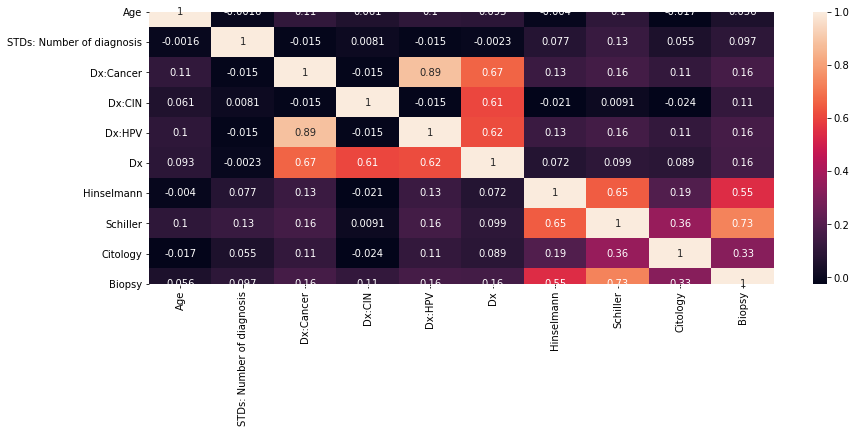

In [30]:
# list the heatmap of top correlation
plt.figure(figsize=(14,5))
sns.heatmap(can1.corr(),annot=True)
plt.show()

# number of variables for heatmap
#10 variables for heatmap

#### observation:
    

### 1.7 Imputing the missing values from the given dataset?

In [32]:
# we will impute the categorical variables with 0 or 1 and continuous variables with median value
can1.isna().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [44]:
# Imputing the missing values from First sexual intercourse
can1['First sexual intercorse'] = can1['First sexual intercourse'].astype(float)
can1['First sexual intercourse'] = can1['First sexual intercourse'].replace({0:can1['First sexual intercourse'].median()})
can1['First sexual intercorse']

0      15.0
1      14.0
2      17.0
3      16.0
4      21.0
       ... 
853    18.0
854    19.0
855    17.0
856    24.0
857    20.0
Name: First sexual intercorse, Length: 858, dtype: float64

In [51]:
# Imputing the missing values from Num of pregnancies
can1['Num of pregnancies'] = can1['Num of pregnancies'].astype(float)
can1['Num of pregnancies'] = can1['Num of pregnancies'].replace({0 : can1['Num of pregnancies'].median()})
can1['Num of pregnancies']

0      1.0
1      1.0
2      1.0
3      4.0
4      4.0
      ... 
853    2.0
854    1.0
855    2.0
856    2.0
857    1.0
Name: Num of pregnancies, Length: 858, dtype: float64

In [53]:
# Imputing the missing values from Smokes
can1['Smokes'] = can1['Smokes'].astype(float)
can1['Smokes'] = can1['Smokes'].replace({0:can1['Smokes'].median()})
can1['Smokes']

0      0.0
1      0.0
2      0.0
3      1.0
4      0.0
      ... 
853    0.0
854    0.0
855    0.0
856    0.0
857    0.0
Name: Smokes, Length: 858, dtype: float64

In [56]:
# Imputing the missing values from Smokes (years)
can1['Smokes (years)'] = can1['Smokes (years)'].astype(float)
can1['Smokes (years)'] = can1['Smokes (years)'].replace({0:can1['Smokes (years)'].median()})
can1['Smokes (years)']

0       0.0
1       0.0
2       0.0
3      37.0
4       0.0
       ... 
853     0.0
854     0.0
855     0.0
856     0.0
857     0.0
Name: Smokes (years), Length: 858, dtype: float64

In [57]:
# Imputing the missing values from Smokes (packs/year)
can1['Smokes (packs/year)']

0       0.0
1       0.0
2       0.0
3      37.0
4       0.0
       ... 
853     0.0
854     0.0
855     0.0
856     0.0
857     0.0
Name: Smokes (packs/year), Length: 858, dtype: object

In [60]:
# Imputing the missing values from Hormonal Contraceptives
can1['Hormonal Contraceptives'] = can1['Hormonal Contraceptives'].astype(float)
can1['Hormonal Contraceptives'] = can1['Hormonal Contraceptives'].replace({0:can1['Hormonal Contraceptives'].median()})
can1['Hormonal Contraceptives']

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
853    1.0
854    1.0
855    1.0
856    1.0
857    1.0
Name: Hormonal Contraceptives, Length: 858, dtype: float64

In [64]:
# Imputing the missing values from Hormonal Contraceptives (years)
can1['Hormonal Contraceptives (years)'] = can1['Hormonal Contraceptives (years)'].astype(float)
can1['Hormonal Contraceptives (years)'] = can1['Hormonal Contraceptives (years)'].replace({0:can1['Hormonal Contraceptives (years)'].median()})
can1['Hormonal Contraceptives (years)']

0       0.25
1       0.25
2       0.25
3       3.00
4      15.00
       ...  
853     0.25
854     8.00
855     0.08
856     0.08
857     0.50
Name: Hormonal Contraceptives (years), Length: 858, dtype: float64

In [66]:
# Imputing the missing values from IUD
can1['IUD'] = can1['IUD'].astype(float)
can1['IUD'] = can1['IUD'].replace({0:can1['IUD'].median()})
can1['IUD']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
853    0.0
854    0.0
855    0.0
856    0.0
857    0.0
Name: IUD, Length: 858, dtype: float64

In [68]:
# Imputing the missing values from IUD (years)
can1['IUD (years)'] = can1['IUD (years)'].astype(float)
can1['IUD (years)'] = can1['IUD (years)'].replace({0:can1['IUD (years)'].median()})
can1['IUD (years)']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
853    0.0
854    0.0
855    0.0
856    0.0
857    0.0
Name: IUD (years), Length: 858, dtype: float64

In [70]:
# Imputing the missing values from STDs
can1['STDs'] = can1['STDs'].astype(float)
can1['STDs'] = can1['STDs'].replace({0:can1['STDs'].median()})
can1['STDs']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
853    0.0
854    0.0
855    0.0
856    0.0
857    0.0
Name: STDs, Length: 858, dtype: float64

In [72]:
# Imputing the missing values from STDs (number)
can1['STDs (number)'] = can1['STDs (number)'].astype(float)
can1['STDs (number)'] = can1['STDs (number)'].replace({0:can1['STDs (number)'].median()})
can1['STDs (number)']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
853    0.0
854    0.0
855    0.0
856    0.0
857    0.0
Name: STDs (number), Length: 858, dtype: float64

In [74]:
# Imputing the missing values from STDs:condylomatosis
can1['STDs:condylomatosis'] = can1['STDs:condylomatosis'].astype(float)
can1['STDs:condylomatosis'] = can1['STDs:condylomatosis'].replace({0:can1['STDs:condylomatosis'].median()})
can1['STDs:condylomatosis']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
853    0.0
854    0.0
855    0.0
856    0.0
857    0.0
Name: STDs:condylomatosis, Length: 858, dtype: float64

In [76]:
# Imputing the missing values from STDs:cervical condylomatosis
can1['STDs:cervical condylomatosis'] = can1['STDs:cervical condylomatosis'].astype(float)
can1['STDs:cervical condylomatosis'] = can1['STDs:cervical condylomatosis'].replace({0:can1['STDs:cervical condylomatosis'].median()})
can1['STDs:cervical condylomatosis']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
853    0.0
854    0.0
855    0.0
856    0.0
857    0.0
Name: STDs:cervical condylomatosis, Length: 858, dtype: float64

In [79]:
# Imputing the missing values from STDs:vaginal condylomatosis
can1['STDs:vaginal condylomatosis'] = can1['STDs:vaginal condylomatosis'].astype(float)
can1['STDs:vaginal condylomatosis'] = can1['STDs:vaginal condylomatosis'].replace({0:can1['STDs:vaginal condylomatosis'].median()})
can1['STDs:vaginal condylomatosis']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
853    0.0
854    0.0
855    0.0
856    0.0
857    0.0
Name: STDs:vaginal condylomatosis, Length: 858, dtype: float64

In [82]:
# Imputing the missing values from STDs:vulvo-perineal condylomatosis
can1['STDs:vulvo-perineal condylomatosis'] = can1['STDs:vulvo-perineal condylomatosis'].astype(float)
can1['STDs:vulvo-perineal condylomatosis'] = can1['STDs:vulvo-perineal condylomatosis'].replace({0:can1['STDs:vulvo-perineal condylomatosis'].median()})
can1['STDs:vulvo-perineal condylomatosis']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
853    0.0
854    0.0
855    0.0
856    0.0
857    0.0
Name: STDs:vulvo-perineal condylomatosis, Length: 858, dtype: float64

In [84]:
# Imputing the missing values from STDs:syphilis
can1['STDs:syphilis'] = can1['STDs:syphilis'].astype(float) 
can1['STDs:syphilis'] = can1['STDs:syphilis'].replace({0:can1['STDs:syphilis'].median()})
can1['STDs:syphilis']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
853    0.0
854    0.0
855    0.0
856    0.0
857    0.0
Name: STDs:syphilis, Length: 858, dtype: float64

In [87]:
# Imputing the missing values from STDs:pelvic inflammatory diseases
can1['STDs:pelvic inflammatory disease'] = can1['STDs:pelvic inflammatory disease'].astype(float)
can1['STDs:pelvic inflammatory disease'] = can1['STDs:pelvic inflammatory disease'].replace({0:can1['STDs:pelvic inflammatory disease'].median()})
can1['STDs:pelvic inflammatory disease']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
853    0.0
854    0.0
855    0.0
856    0.0
857    0.0
Name: STDs:pelvic inflammatory disease, Length: 858, dtype: float64

In [89]:
# Imputing the missing values from STDs:genital herpes
can1['STDs:genital herpes'] = can1['STDs:genital herpes'].astype(float)
can1['STDs:genital herpes'] = can1['STDs:genital herpes'].replace({0:can1['STDs:genital herpes'].median()})
can1['STDs:genital herpes']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
853    0.0
854    0.0
855    0.0
856    0.0
857    0.0
Name: STDs:genital herpes, Length: 858, dtype: float64

In [91]:
# Imputing the missing values from STDs:molluscum contagiosum
can1['STDs:molluscum contagiosum'] = can1['STDs:molluscum contagiosum'].astype(float)
can1['STDs:molluscum contagiosum'] = can1['STDs:molluscum contagiosum'].replace({0:can1['STDs:molluscum contagiosum'].median()})
can1['STDs:molluscum contagiosum']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
853    0.0
854    0.0
855    0.0
856    0.0
857    0.0
Name: STDs:molluscum contagiosum, Length: 858, dtype: float64

In [93]:
# Imputing the missing values from STDs:AIDS
can1['STDs:AIDS'] = can1['STDs:AIDS'].astype(float)
can1['STDs:AIDS'] = can1['STDs:AIDS'].replace({0:can1['STDs:AIDS'].median()})
can1['STDs:AIDS']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
853    0.0
854    0.0
855    0.0
856    0.0
857    0.0
Name: STDs:AIDS, Length: 858, dtype: float64

In [95]:
# Imputing the missing values from STDs:HIV
can1['STDs:HIV'] = can1['STDs:HIV'].astype(float)
can1['STDs:HIV'] = can1['STDs:HIV'].replace({0:can1['STDs:HIV'].median()})
can1['STDs:HIV']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
853    0.0
854    0.0
855    0.0
856    0.0
857    0.0
Name: STDs:HIV, Length: 858, dtype: float64

In [97]:
# Imputing the missing values from STDs:Hepatitis B
can1['STDs:Hepatitis B'] = can1['STDs:Hepatitis B'].astype(float)
can1['STDs:Hepatitis B'] = can1['STDs:Hepatitis B'].replace({0:can1['STDs:Hepatitis B'].median()})
can1['STDs:Hepatitis B']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
853    0.0
854    0.0
855    0.0
856    0.0
857    0.0
Name: STDs:Hepatitis B, Length: 858, dtype: float64

In [99]:
# Imputing the missing values from STDs:HPV
can1['STDs:HPV'] = can1['STDs:HPV'].astype(float) 
can1['STDs:HPV'] = can1['STDs:HPV'].replace({0:can1['STDs:HPV'].median()})
can1['STDs:HPV']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
853    0.0
854    0.0
855    0.0
856    0.0
857    0.0
Name: STDs:HPV, Length: 858, dtype: float64

In [101]:
# Imputing the missing values from STDs: Time since first diagnosis
can1['STDs: Time since first diagnosis'] = can1['STDs: Time since first diagnosis'].astype(float)
can1['STDs: Time since first diagnosis'] = can1['STDs: Time since first diagnosis'].replace({0:can1['STDs: Time since first diagnosis'].median()})
can1['STDs: Time since first diagnosis']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
853    0.0
854    0.0
855    0.0
856    0.0
857    0.0
Name: STDs: Time since first diagnosis, Length: 858, dtype: float64

In [103]:
# Imputing the missing values from STDs: Time since last diagnosis
can1['STDs: Time since last diagnosis'] = can1['STDs: Time since last diagnosis'].astype(float)
can1['STDs: Time since last diagnosis'] = can1['STDs: Time since last diagnosis'].replace({0:can1['STDs: Time since last diagnosis'].median()})
can1['STDs: Time since last diagnosis']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
853    0.0
854    0.0
855    0.0
856    0.0
857    0.0
Name: STDs: Time since last diagnosis, Length: 858, dtype: float64

###  1.8 Imputing null values for categorical variables for get_dummies

In [105]:
pd.get_dummies(can1['Smokes']).head()

,0.0,1.0
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0


### 1.10 Data Visualization for checking any categorical variables or not using count plot?

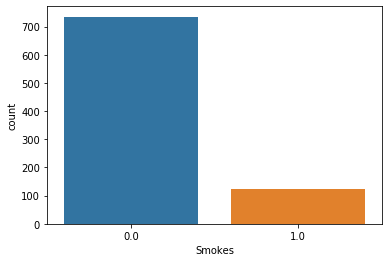

In [107]:
sns.countplot(data=can1,x='Smokes')
plt.show()

### 1.11 splitting the dataset into dependent and independent variables?

In [109]:
from sklearn.model_selection import train_test_split
x = can1.iloc[:,:-1]
y = can1.iloc[:,-1]

### 1.12 splitting the dataset into  training and test set?

In [110]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=0)
print(xtrain.shape,"\n",ytrain.shape,"\n",xtest.shape,"\n",ytest.shape)

(600, 36) 
 (600,) 
 (258, 36) 
 (258,)


# The End